## Exercise 3

Considere o modelo de entrada-saída na equação

$$ \frac{d²y(t)}{dt²} + 2\frac{dy(t)}{dt} + y(t) = 4\frac{d²u(t)}{du²} + 15\frac{du(t)}{du} + 19u(t)$$

1. Defina o polinômio característico e represente graficamente os modos do sistema
2. Dadas as condições iniciais na equação, encontre a evolução livre do sistema na equação

$$ y(t)\vert_{s \to 0} = 1, \ \frac{dy(t)}{dt}\Big\vert_{s \to 0} = 1 $$

3. Encontre a resposta forçada do sistema sujeito a uma entrada em degrau unitário
4. Por meio da linguagem de programação de sua escolha, plote a resposta y(t) e comente seus resultados


## Parte 1

1. Defina o polinômio característico e represente graficamente os modos do sistema

Considerando todas as condições iniciais iguais a zero, a transformada de laplace da equação pode ser dada por

$$
(s² + 2s + 1)Y(s) = (4s² + 15s + 19)U(s) \\
\therefore F(s) = \frac{Y(s)}{U(s)} = \frac{4s² + 15s + 19}{s² + 2s + 1}
$$

Logo, o polinômio característico pode ser dado pelo denominador $D(s)$ da função de transferência $F(s)$. Por produtos notáveis, $D(s)$ pode ser escrito como:

$$
D(s) = s² + 2s + 1 = (s+1)²
$$

Os modos do sistema são definidos como as raízes do polinômio característico, também conhecidos como os **polos** do sistema. Logo, o sistema possui dois modos reais negativos iguais a -1. Podemos plotar essas raízes no plano de Argard-Gauss, também conhecido como plano dos complexos. Em python, podemos fazer da seguinte forma:

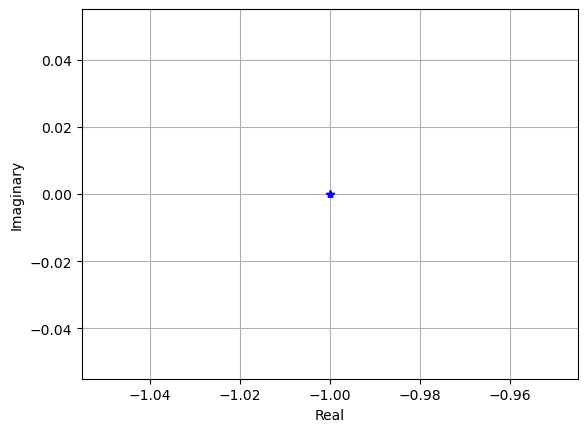

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([-1, -1])

x = data.real
y = data.imag

plt.plot(x, y, 'b*')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()

## Parte 2

2. Dadas as condições iniciais na equação, encontre a evolução livre do sistema na equação

Nesse caso, devemos levar em consideração a seguinte transformada de Laplace:

$$
\mathcal{L}\Big[ \frac{d^nf(t)}{dt^n} \Big] = s^nF(s) - \sum\limits_{k = 1}^{n}s^{n-k}f^{k-s}(0)
$$

Logo, aplicando a transformada de Laplace:

$$
s²Y(s) - sy(0) - \dot{y}(0) + 2sY(s) -2y(0) + Y(s) = (4s² + 15s + 19)U(s) \\
\therefore (s² + 2s + 1)Y(s) - s - 3 = (4s² + 15s + 19)U(s) \\
\therefore (s² + 2s + 1)Y(s) = (4s² + 15s + 19)U(s) + s + 3 \\
\therefore Y(s) = \underbrace{\frac{4s² + 15s + 19}{s² + 2s + 1}U(s)}_{Forced \ Response} + \underbrace{\frac{s + 3}{s² + 2s + 1}}_{Free \ Response}
$$

Nesse caso, tudo que independe da entrada $U(s)$ é considerado como a resposta livre e tudo que depende de $U(s)$ é considerado como resposta forçada. Como queremos a evolução livre, primeiro precisamos decompor em frações parciais:

$$
Y_{Free}(s) = \frac{s+3}{s² + 2s + 1} = \frac{s+3}{(s+1)²} = \frac{A_0}{(s+1)²} + \frac{A_1}{s+1}
$$

Vamos achar A_0 e A_1 como já descrito no **Exercise 1**:

$$
A_0 = (s+1)²Y_{Free}(s) \vert_{s \to -1} = (-1 + 3) = 2 \\
A_1 = \frac{d(s+1)²Y_{Free}(s)}{ds} \Big\vert_{s \to -1} = \frac{d(s+3)}{ds} \Big\vert_{s \to -1} = 1
$$

Logo:

$$
Y_{Free}(s) = \frac{2}{(s+1)²} + \frac{1}{s+1}
$$

Assim, aplicando a inversa de Laplace:

$$
y_{Free}(t) = e^{-t} + 2te^{-t}
$$

Em python, poderiamos usar a função `nlsys()` da biblioteca `control`para criar um modelo de entrada e saída não linear (que é nosso caso). Porém, ao invés disso, vamos aproveitar que já temos nossa função de transferência separada em parte Livre e Parte Forçada para resolver como já temos resolvido no decorrer desse trabalho:

In [12]:
import sympy as sym
from sympy.abc import s,t

Yfree = (s + 3)/(s**2 + 2*s + 1)

Yfree

(s + 3)/(s**2 + 2*s + 1)

In [13]:
Yfree_pf = sym.apart(Yfree)

Yfree_pf

1/(s + 1) + 2/(s + 1)**2

In [14]:
yfree = sym.inverse_laplace_transform(Yfree, s, t)

yfree

(2*t + 1)*exp(-t)*Heaviside(t)

Agora, utilizando a biblioteca `control`, podemos achar a resposta livre do sistema como uma resposta ao impulso, já que, nesse caso, $U(s) = 1$. Observe:

In [7]:
import control as ct

num_free = [1, 3]
den = [1, 2, 1]

Y_free = ct.tf(num_free, den)

Y_free

TransferFunction(array([1, 3]), array([1, 2, 1]))

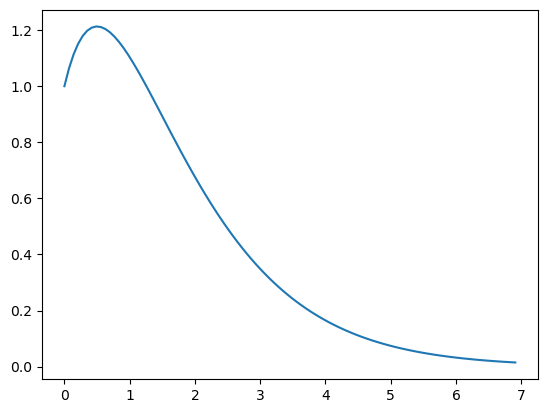

In [8]:
x_free, y_free = ct.impulse_response(Y_free)

plt.plot(x_free, y_free)
plt.show()

## Parte 3

3. Encontre a resposta forçada do sistema sujeito a uma entrada em degrau unitário

Como encontrado na **Parte 2**, a resposta forçada pode ser escrita como:

$$
Y_{Forced}(s) = \frac{4s² + 15s + 19}{s² + 2s + 1}U(s)
$$

Como sabemos que $U(s) = \frac{1}{s}$ no caso do degral unitário, podemos decompor a resposta forçada da seguinte forma:

$$
Y_{Forced}(s) = \frac{4s² + 15s + 19}{s(s+1)²} = \frac{B_0}{(s+1)²} + \frac{B_1}{s+1} + \frac{C}{s}
$$

Logo:

$$
B_0 = (s+1)²Y_{Forced}(s) \vert_{s \to -1} = \frac{4(-1)² + 15(-1) + 19}{-1} = -8 \\
B_1 = \frac{d(s+1)²Y_{Forced}(s)}{ds} \Big\vert_{s \to -1} = \frac{d}{ds} \frac{4s² + 15s + 19}{s} \Big\vert_{s \to -1} = \frac{(8s + 15)s - (4s² + 15s + 19}{s²} \Big\vert_{s \to -1} = -15 \\
C = (s)²Y_{Forced}(s) \vert_{s \to 0} = 19
$$

Logo:

$$
Y_{Forced}(s) = \frac{-8}{(s+1)²} + \frac{-15}{s+1} + \frac{19}{s}
$$

Assim, aplicando a inversa de laplace:

$$
y_{Forced}(t) = 19 - 15e^{-t} -8te^{-t}
$$

Em python:

In [17]:
Yforced = (4*(s**2) + 15*s + 19)/(s*(s**2 + 2*s + 1))

Yforced

(4*s**2 + 15*s + 19)/(s*(s**2 + 2*s + 1))

In [18]:
Yforced_pf = sym.apart(Yforced)

Yforced_pf

-15/(s + 1) - 8/(s + 1)**2 + 19/s

In [19]:
yforced = sym.inverse_laplace_transform(Yforced, s, t)

yforced

(-8*t + 19*exp(t) - 15)*exp(-t)*Heaviside(t)

Utilizando a biblioteca `control`, podemos achar a resposta do sistema ao degrau unitário e plotar. Observe:

In [20]:
num_forced = [4, 15, 19]
den = [1, 2, 1]

Y_forced = ct.tf(num_forced, den)

Y_forced

TransferFunction(array([ 4, 15, 19]), array([1, 2, 1]))

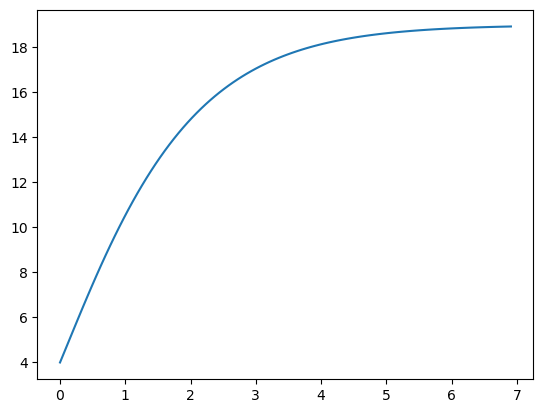

In [21]:
x_forced, y_forced = ct.step_response(Y_forced)

plt.plot(x_forced, y_forced)
plt.show()

## Parte 4

4. Por meio da linguagem de programação de sua escolha, plote a resposta y(t) e comente seus resultados

Finalmente, podemos somar as respostas de $y_{Free}(t) \ e \ y_{Forced}(t)$ para achar nossa resposta final. 

$$
y(t) = y_{Free}(t) + y_{Forced}(t) = (e^{-t} + 2te^{-t}) + (19 - 15e^{-t} -8te^{-t})
$$

Em python:

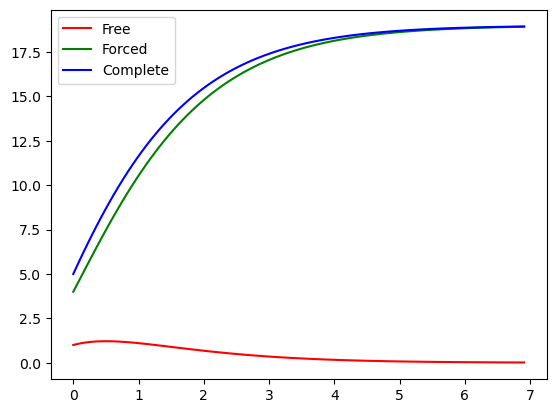

In [25]:
x = x_free
y = y_free + y_forced

plt.plot(x_free, y_free, color='r', label='Free')
plt.plot(x_forced, y_forced, color='g', label='Forced')
plt.plot(x, y, color='b', label='Complete')

plt.legend()
plt.show()

Observe que a resposta completa é levemente maior que a resposta forçada no início. Mas como a resposta livre decai à zero com o tempo, a resposta forçada se aproxima cada vez mais da resposta completa, deixado a resposta livre desprezivel.